<a href="https://colab.research.google.com/github/Raedjd/Smart_E-learning/blob/master/dataRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 22.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630184 sha256=b2a3278ea7b8be679d921f0e597f2b02294b4f2ca864f92949d81691f426bd16
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
!pip install colabcode

     |████████████████████████████████| 745 kB 22.7 MB/s 
     |████████████████████████████████| 8.3 MB 47.6 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 428 kB 50.0 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 343 kB 47.8 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 130 kB 49.6 MB/s 
     |████████████████████████████████| 561 kB 46.5 MB/s 
     |████████████████████████████████| 130 kB 52.5 MB/s 
     |████████████████████████████████| 130 kB 51.2 MB/s 
     |████████████████████████████████| 130 kB 51.3 MB/s 
     |████████████████████████████████| 130 kB 49.2 MB/s 
     |████████████████████████████████| 129 kB 54.4 MB/s 
     |████████████████████████████████| 125 kB 51.5 MB/s 
     |██████████████████

In [ ]:
!pip install fastapi

     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 10.9 MB 43.7 MB/s 
     |████████████████████████████████| 58 kB 5.3 MB/s 


In [ ]:
from surprise import Dataset, Reader
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import Reader
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
from surprise.model_selection import GridSearchCV
from collections import defaultdict
from colabcode import ColabCode
from fastapi import FastAPI
import json

In [ ]:
import pandas as pd

data = {'Profils':  ['IT Audit Consultant', 'IT Senior Helpdesk Service Support','Software Development Engineer','DevOps Engineer','Data Engineer','Data Scientist','Data analyst','Infrastructure Engineer','Security Engineer','Technical Lead','IT Audit Consultant', 'IT Senior Helpdesk Service Support','Software Development Engineer','DevOps Engineer','Data Engineer','Data Scientist','Data analyst','Infrastructure Engineer','Security Engineer','Technical Lead'],
        'Courses': ['COBIT','Selenium','Jakarta EE','Jenkins','Python','R','Python','Docker','Penetration test','PMP','Penetration test','PMP','Jakarta EE','Jenkins','COBIT','Slenium','R','Python','R','Jenkins'],
        'Appreciation':[4,1,3,4,3,5,2,3,3,1,2,5,5,3,1,4,3,1,2,2]
        }

df = pd.DataFrame (data, columns = ['Profils','Courses','Appreciation'])

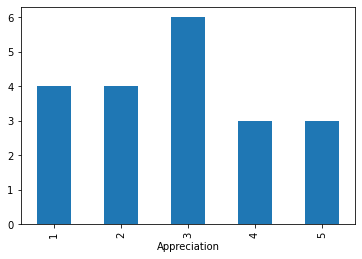

In [ ]:
df.groupby('Appreciation').count()['Profils'].plot.bar()

In [ ]:
df.head()

,Profils,Courses,Appreciation
0,IT Audit Consultant,COBIT,4
1,IT Senior Helpdesk Service Support,Selenium,1
2,Software Development Engineer,Jakarta EE,3
3,DevOps Engineer,Jenkins,4
4,Data Engineer,Python,3


In [ ]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

In [ ]:
data = Dataset.load_from_df(df,reader)

In [ ]:
kf = KFold(n_splits=3)
algo = KNNBasic()
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_pred = predictions

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.6519
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3015
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3315


In [ ]:
best_pred

[Prediction(uid='Software Development Engineer', iid='Jakarta EE', r_ui=5.0, est=3.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='Data analyst', iid='Python', r_ui=2.0, est=2.642857142857143, details={'was_impossible': True, 'reason': 'Not enough neighbors.'}),
 Prediction(uid='Data Engineer', iid='Python', r_ui=3.0, est=2.642857142857143, details={'was_impossible': True, 'reason': 'Not enough neighbors.'}),
 Prediction(uid='IT Senior Helpdesk Service Support', iid='PMP', r_ui=5.0, est=2.642857142857143, details={'was_impossible': True, 'reason': 'Not enough neighbors.'}),
 Prediction(uid='Security Engineer', iid='Penetration test', r_ui=3.0, est=2.642857142857143, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='IT Audit Consultant', iid='Penetration test', r_ui=2.0, est=2.642857142857143, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})]

In [ ]:
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

In [ ]:
top_n

defaultdict(list,
            {'Data Engineer': [('R', 2.642857142857143),
              ('Selenium', 2.642857142857143),
              ('Jenkins', 2.642857142857143),
              ('Jakarta EE', 2.642857142857143),
              ('Python', 2.642857142857143),
              ('Docker', 2.642857142857143),
              ('Slenium', 2.642857142857143),
              ('PMP', 2.642857142857143)],
             'Data Scientist': [('COBIT', 2.642857142857143),
              ('Selenium', 2.642857142857143),
              ('Jenkins', 2.642857142857143),
              ('Jakarta EE', 2.642857142857143),
              ('Python', 2.642857142857143),
              ('Docker', 2.642857142857143),
              ('PMP', 2.642857142857143)],
             'Data analyst': [('Slenium', 4.0),
              ('COBIT', 2.642857142857143),
              ('Selenium', 2.642857142857143),
              ('Jenkins', 2.642857142857143),
              ('Jakarta EE', 2.642857142857143),
              ('Python', 2.642857

In [ ]:
cc = ColabCode(port=1200, code=False)

In [ ]:
app = FastAPI()

@app.get("/")
async def read_root():
  return {json.dumps(top_n)}

In [ ]:
cc.run_app(app=app)

Public URL: NgrokTunnel: "https://0ee8-34-123-4-39.ngrok.io" -> "http://localhost:1200"


INFO:     Started server process [56]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:1200 (Press CTRL+C to quit)


INFO:     196.185.173.148:0 - "GET / HTTP/1.1" 200 OK
INFO:     196.185.173.148:0 - "GET /robots.txt HTTP/1.1" 404 Not Found
INFO:     196.185.173.148:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     196.203.81.6:0 - "GET / HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [56]
